In [5]:
import sys
from pathlib import Path

# Get the absolute path to the project root
notebook_path = Path('/Users/nirmal/Documents/np_research/ManGo_code/ManGo')
project_root = str(notebook_path)

# Add the project root to Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now you can import your module
from src.models.mg_rig import RobustRegressor

# Verify the import worked
print(f"Project root: {project_root}")
print(f"Available at: {RobustRegressor.__module__}")

Project root: /Users/nirmal/Documents/np_research/ManGo_code/ManGo
Available at: src.models.mg_rig


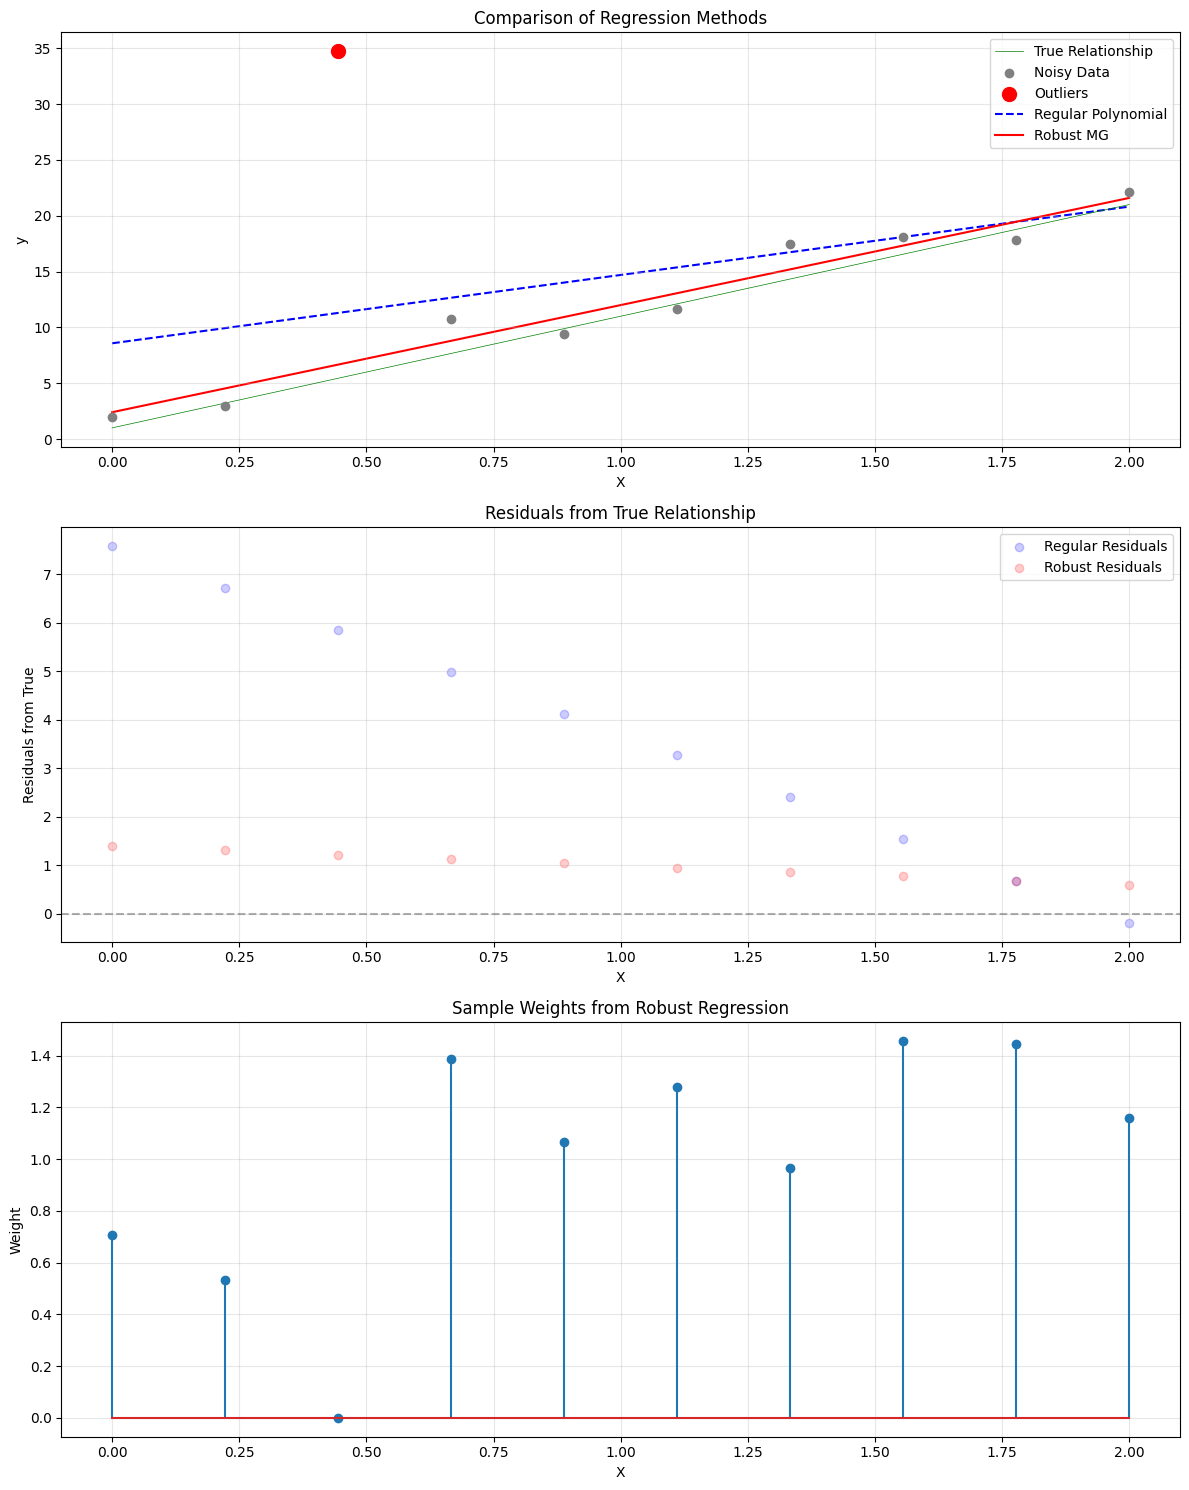

Coefficients:
True:     [1, 2]
Regular:  [0.         6.11971484]
Robust MG: [2.40327117 9.59511332]

MSE against true relationship (excluding outliers):
Regular Polynomial: 24.6826
Robust MG:         1.2270


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
# y_noisy[2] += [8.0]  # Add outliers
y_noisy[2] = y_noisy[2] + 28.0 

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree, tol=10-8)
mg_model.fit(X, y_noisy)
y_pred_robust = mg_model.predict(X)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

In [7]:
mg_model.weights

array([7.08135844e-01, 5.31714377e-01, 5.04168900e-10, 1.38707746e+00,
       1.06481250e+00, 1.27818013e+00, 9.67727648e-01, 1.45641582e+00,
       1.44562114e+00, 1.16031507e+00])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y = 2.0 * np.exp(1.8 * X.ravel()) + np.random.normal(0, 0.2, 10)
# y = 2*X +1
y[8:] += [80.0, -8.0]  # Add outliers
# Introduce outliers
# y[8:] += np.array([8.0, -80.0])  # one high outlier, one low outlier

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit regular polynomial regression
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y)
y_pred_regular = poly_reg.predict(X)  # Predict on training points for residuals
y_pred_regular_test = poly_reg.predict(X_test)  # Predict on test points for curve

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree)
mg_model.fit(X, y.flatten())
y_pred_robust = mg_model.predict(X)  # Predict on training points for residuals
y_pred_robust_test = mg_model.predict(X_test)  # Predict on test points for curve
print(f'model coeff: {mg_model.coefficients}')

# Calculate residuals
residuals_regular = y - y_pred_regular
residuals_robust = y - y_pred_robust

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), height_ratios=[2, 1, 1])

# Plot regression curves
ax1.scatter(X, y, color='gray', label='Data', zorder=2)
ax1.scatter(X[8:], y[8:], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison: Regular vs Robust Machine Gnostics Polynomial Regression')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# plot history of loss
ax3.plot(mg_model._history, color='red', label='Loss History - MG Regression')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Loss')
ax3.set_title('Loss History of Robust MG Regression - Average Irrelevance')

ax3.legend()
ax3.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print mean squared error for both methods (excluding outliers)
mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
print(f"MSE (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG Regression: {mse_robust:.4f}")

# Print max absolute residuals (excluding outliers)
max_resid_regular = np.max(np.abs(residuals_regular[:-2]))
max_resid_robust = np.max(np.abs(residuals_robust[:-2]))
print(f"\nMax Absolute Residuals (excluding outliers):")
print(f"Regular Polynomial: {max_resid_regular:.4f}")
print(f"Robust MG Regression: {max_resid_robust:.4f}")

In [ ]:
residuals_regular

In [ ]:
residuals_robust

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Create multiple test functions
def generate_data(func_type, X, noise_level=1.8, outlier_positions=[1, 2], outlier_values=[80.0, -15.0]):
    if func_type == 'cosine':
        y = 15 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 1.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 0.05 * X.ravel()**3 - 30 * X.ravel()**2 + 1
    
    y = y + np.random.normal(0, noise_level, len(X))
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data - changed to 5 points
    X = np.linspace(0, 2, 6).reshape(-1, 1)  # 5 points total
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Fit models
    degree = 2  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.6)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.6)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)
outlier_positions=[2, 7]

# Create multiple test functions
def generate_data(func_type, X, noise_level=0.9, outlier_positions=outlier_positions, outlier_values=[80.0, -10.0]):
    if func_type == 'cosine':
        y = 5 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 10.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 2 * X.ravel()**3 - 3 * X.ravel()**2 + 1
    
    # Add noise
    y = y + np.random.normal(0, noise_level, len(X))
    
    # Add outliers
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 10).reshape(-1, 1)
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Fit models
    degree = 3  # Increased degree for more complex functions
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[outlier_positions], y[outlier_positions], color='red', s=100, label='Outliers', zorder=3)
    # axes[i,0].scatter(X[8:], y[2,8], color='red', s=100, label='Outliers', zorder=3)
    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Print metrics
    mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
    mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Robust MG Regression: {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(func_type, X, params):
    """Generate synthetic data with different profiles."""
    # Base function
    if func_type == 'cosine':
        y = params['amplitude'] * np.cos(params['frequency'] * X.ravel()) + params['offset']
    elif func_type == 'exponential':
        y = params['amplitude'] * np.exp(params['rate'] * X.ravel())
    elif func_type == 'sigmoid':
        y = params['amplitude'] / (1 + np.exp(-params['rate'] * (X.ravel() - params['midpoint'])))
    elif func_type == 'polynomial':
        y = (params['a'] * X.ravel()**3 + 
             params['b'] * X.ravel()**2 + 
             params['c'] * X.ravel() + 
             params['d'])
    
    # Add base noise
    y_ = y + np.random.normal(0, params['noise_level'], len(X))
    
    # Add trend if specified
    if params['trend'] != 0:
        y_ += params['trend'] * X.ravel()
    
    # Add outliers
    if params['outlier_mode'] == 'random':
        # Random outliers
        n_outliers = int(len(X) * params['outlier_fraction'])
        outlier_idx = np.random.choice(len(X), n_outliers, replace=False)
        outlier_values = np.random.normal(params['outlier_mean'], 
                                        params['outlier_std'], 
                                        n_outliers)
        y_[outlier_idx] += outlier_values
    elif params['outlier_mode'] == 'systematic':
        # Systematic outliers at specific positions
        y_[params['outlier_positions']] += params['outlier_values']
    
    return y, y_

# Define test profiles with different characteristics
test_profiles = {
    'cosine': {
        'amplitude': 15,
        'frequency': 2 * np.pi,
        'offset': 2,
        'noise_level': 5,
        'trend': 2,  # Linear trend
        'outlier_mode': 'random',
        'outlier_fraction': 0.1,
        'outlier_mean': 0,
        'outlier_std': 50
    },
    'exponential': {
        'amplitude': 2,
        'rate': 1.8,
        'noise_level': 8,
        'trend': -1,  # Negative trend
        'outlier_mode': 'systematic',
        'outlier_positions': [20, 40, 60, 80],
        'outlier_values': [80, -60, 100, -80]
    },
    'sigmoid': {
        'amplitude': 100,
        'rate': 5,
        'midpoint': 1,
        'noise_level': 10,
        'trend': 0,
        'outlier_mode': 'random',
        'outlier_fraction': 0.15,
        'outlier_mean': 50,
        'outlier_std': 30
    },
    'polynomial': {
        'a': 0.005,
        'b': -0.3,
        'c': 5,
        'd': 70,
        'noise_level': 15,
        'trend': 1.5,
        'outlier_mode': 'systematic',
        'outlier_positions': [10, 30, 50, 70, 90],
        'outlier_values': [-60, 80, -70, 90, -50]
    }
}

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 100).reshape(-1, 1)
    y, y_ = generate_data(func, X, test_profiles[func])
    X_test = np.linspace(0, 2, 200).reshape(-1, 1)
    
    # ... rest of the code remains the same ...
    
    # Fit models
    degree = 5  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y_, color='gray', label='Data', zorder=2, alpha=0.3)
    # true data
    axes[i,0].plot(X, y, color='g', label='Data', zorder=2, alpha=0.3)
    # true data)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.3)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.63)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.3)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.3)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [ ]:
def generate_data(func_type, X, params):
    """Generate synthetic data with different profiles and outlier clusters."""
    # Base function
    if func_type == 'cosine':
        y = params['amplitude'] * np.cos(params['frequency'] * X.ravel()) + params['offset']
    elif func_type == 'exponential':
        y = params['amplitude'] * np.exp(params['rate'] * X.ravel())
    elif func_type == 'sigmoid':
        y = params['amplitude'] / (1 + np.exp(-params['rate'] * (X.ravel() - params['midpoint'])))
    elif func_type == 'polynomial':
        y = (params['a'] * X.ravel()**3 + 
             params['b'] * X.ravel()**2 + 
             params['c'] * X.ravel() + 
             params['d'])
    
    # Add base noise
    y_ = y + np.random.normal(0, params['noise_level'], len(X))
    
    # Add trend if specified
    if params['trend'] != 0:
        y_ += params['trend'] * X.ravel()
    
    # Add outlier clusters
    for cluster in params['outlier_clusters']:
        center = cluster['center']
        width = cluster['width']
        strength = cluster['strength']
        
        # Create cluster of outliers
        cluster_mask = np.abs(X.ravel() - center) < width/2
        n_points = np.sum(cluster_mask)
        
        if n_points > 0:
            # Generate cluster noise
            cluster_noise = np.random.normal(
                strength['mean'], 
                strength['std'], 
                n_points
            )
            y[cluster_mask] += cluster_noise
    
    return y, y_

# Define test profiles with outlier clusters
test_profiles = {
    'cosine': {
        'amplitude': 15,
        'frequency': 2 * np.pi,
        'offset': 2,
        'noise_level': 5,
        'trend': 2,
        'outlier_clusters': [
            {'center': 0.5, 'width': 0.2, 'strength': {'mean': 30, 'std': 10}},
            # {'center': 1.2, 'width': 0.3, 'strength': {'mean': -40, 'std': 15}},
            # {'center': 1.8, 'width': 0.2, 'strength': {'mean': 60, 'std': 12}}
        ]
    },
    'exponential': {
        'amplitude': 2,
        'rate': 1.8,
        'noise_level': 8,
        'trend': -1,
        'outlier_clusters': [
            # {'center': 0.3, 'width': 0.25, 'strength': {'mean': -60, 'std': 15}},
            {'center': 1.0, 'width': 0.2, 'strength': {'mean': 80, 'std': 20}},
            # {'center': 1.7, 'width': 0.3, 'strength': {'mean': -70, 'std': 18}}
        ]
    },
    'sigmoid': {
        'amplitude': 100,
        'rate': 5,
        'midpoint': 1,
        'noise_level': 10,
        'trend': 0,
        'outlier_clusters': [
            {'center': 0.4, 'width': 0.2, 'strength': {'mean': 90, 'std': 15}},
            # {'center': 1.1, 'width': 0.25, 'strength': {'mean': -50, 'std': 12}},
            # {'center': 1.6, 'width': 0.3, 'strength': {'mean': 40, 'std': 10}}
        ]
    },
    'polynomial': {
        'a': 0.005,
        'b': -0.3,
        'c': 5,
        'd': 70,
        'noise_level': 15,
        'trend': 1.5,
        'outlier_clusters': [
            # {'center': 0.6, 'width': 0.3, 'strength': {'mean': -80, 'std': 20}},
            {'center': 1.3, 'width': 0.2, 'strength': {'mean': 90, 'std': 15}},
            # {'center': 1.9, 'width': 0.25, 'strength': {'mean': -60, 'std': 18}}
        ]
    }
}

In [ ]:
# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 100).reshape(-1, 1)
    y, y_clean = generate_data(func, X, test_profiles[func])
    X_test = np.linspace(0, 2, 200).reshape(-1, 1)
    
    # ... rest of the code remains the same ...
    
    # Fit models
    degree = 3  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2, alpha=0.3)
    # line plot -true data
    axes[i,0].plot(X, y_clean, color='g', alpha=0.1, label='True Data', zorder=2)
    # Highlight outliers
    # axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.3)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.63)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.3)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.3)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [ ]:
# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 4, figsize=(25, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 100).reshape(-1, 1)
    y, y_clean = generate_data(func, X, test_profiles[func])
    X_test = np.linspace(0, 2, 200).reshape(-1, 1)
    
    # Fit models
    degree = 3  # Reduced degree due to fewer points
    
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves (first subplot)
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2, alpha=0.3)
    axes[i,0].plot(X, y_clean, color='g', alpha=0.1, label='True Data', zorder=2)
    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals (second subplot)
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.3)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.63)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.3)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.3)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Plot coefficients comparison (third subplot)
    coef_names = [f'θ{j}' for j in range(degree + 1)]
    x_pos = np.arange(len(coef_names))
    width = 0.2
    
    # Get coefficients from all models
    regular_coef = poly_reg.named_steps['linearregression'].coef_
    ridge_coef = ridge_reg.named_steps['ridge'].coef_
    lasso_coef = lasso_reg.named_steps['lasso'].coef_
    mg_coef = mg_model.coefficients
    
    # Plot coefficients
    axes[i,2].bar(x_pos - 1.5*width, regular_coef, width, label='Regular', color='blue', alpha=0.6)
    axes[i,2].bar(x_pos - 0.5*width, ridge_coef, width, label='Ridge', color='green', alpha=0.6)
    axes[i,2].bar(x_pos + 0.5*width, lasso_coef, width, label='Lasso', color='magenta', alpha=0.6)
    axes[i,2].bar(x_pos + 1.5*width, mg_coef, width, label='MG', color='red', alpha=0.6)
    
    axes[i,2].set_xlabel('Coefficient')
    axes[i,2].set_ylabel('Value')
    axes[i,2].set_title(f'Model Coefficients - {func.capitalize()}')
    axes[i,2].set_xticks(x_pos)
    axes[i,2].set_xticklabels(coef_names)
    axes[i,2].legend()
    axes[i,2].grid(True, alpha=0.3)
    
    # Plot weights comparison (fourth subplot)
    # Use inverse of absolute residuals as weights for traditional methods
    reg_weights = 1 / (1 + np.abs(residuals_regular))
    ridge_weights = 1 / (1 + np.abs(residuals_ridge))
    lasso_weights = 1 / (1 + np.abs(residuals_lasso))
    
    # Normalize all weights to [0,1]
    reg_weights = reg_weights / np.max(reg_weights)
    ridge_weights = ridge_weights / np.max(ridge_weights)
    lasso_weights = lasso_weights / np.max(lasso_weights)
    mg_weights = mg_model.weights / np.max(mg_model.weights)
    
    axes[i,3].plot(X, reg_weights, 'b--', label='Regular', alpha=0.6)
    axes[i,3].plot(X, ridge_weights, 'g-.', label='Ridge', alpha=0.6)
    axes[i,3].plot(X, lasso_weights, 'm:', label='Lasso', alpha=0.6)
    axes[i,3].plot(X, mg_weights, 'r-', label='MG', alpha=0.6)
    axes[i,3].fill_between(X.ravel(), mg_weights, alpha=0.2, color='red')
    
    axes[i,3].set_xlabel('X')
    axes[i,3].set_ylabel('Normalized Weight')
    axes[i,3].set_title(f'Weight Comparison - {func.capitalize()}')
    axes[i,3].legend()
    axes[i,3].grid(True, alpha=0.3)
    axes[i,3].set_ylim(0, 1.1)

    # Calculate and print metrics
    good_indices = np.setdiff1d(np.arange(len(X)), outlier_positions)
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 2, 50).reshape(-1, 1)  # More points for smoother curves
noise = np.random.normal(0, 0.2, 50)
y = 4 * X.ravel() + 1 + noise  # Linear relationship with noise

# Add some outliers
outlier_idx = [10, 30, 40]
y[outlier_idx] += [5.0, -5.0, 16.0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
degree = 2
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_regular_train = poly_reg.predict(X_train)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree, mg_loss='hi')
mg_model.fit(X_train, y_train)
y_pred_robust_train = mg_model.predict(X_train)
y_pred_robust_test = mg_model.predict(X_test)

# ...existing code...

# Create figure with subplots with adjusted height ratios
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), height_ratios=[2, 1, 1])

# Plot 1: Training and Test Data with Predictions
ax1.scatter(X_train, y_train, c='gray', label='Training Data', alpha=0.6, s=100, zorder=2)
ax1.scatter(X_test, y_test, c='red', label='Test Data', alpha=0.6, s=100, zorder=2)

# Sort X values for smooth curve plotting
X_plot = np.sort(X_train, axis=0)
X_test_plot = np.sort(X_test, axis=0)

# Plot predictions with smoother curves
ax1.plot(X_plot, mg_model.predict(X_plot), 'r-', label='MG', linewidth=2.5, zorder=3)
ax1.plot(X_plot, poly_reg.predict(X_plot), 'b--', label='Regular Poly', linewidth=2.5, zorder=3)

ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Model Predictions on Training and Test Data', fontsize=14, pad=20)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# Plot 2: Residuals with clearer visualization
residuals_regular = y_train - poly_reg.predict(X_train)
residuals_robust = y_train - mg_model.predict(X_train)

ax2.scatter(X_train, residuals_regular, c='blue', label='Regular', alpha=0.6, s=80)
ax2.scatter(X_train, residuals_robust, c='red', label='MG', alpha=0.6, s=80)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residual Plot', fontsize=14, pad=20)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')

# Plot 3: Loss History with clearer weight visualization
ax3.plot(mg_model._history, 'r-', label='Loss', linewidth=2)
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12, color='r')
ax3.set_title('Loss History and Sample Weights', fontsize=14, pad=20)
ax3.tick_params(axis='y', labelcolor='r')
ax3.grid(True, alpha=0.3, linestyle='--')

# Add sample weights on secondary y-axis with better formatting
ax3_twin = ax3.twinx()
ax3_twin.plot(range(len(X_train)), mg_model.weights, 'b--', label='Weights', linewidth=2)
ax3_twin.fill_between(range(len(X_train)), mg_model.weights, alpha=0.2, color='blue')
ax3_twin.set_ylabel('Sample Weights', fontsize=12, color='b')
ax3_twin.tick_params(axis='y', labelcolor='b')

# Add combined legend for loss and weights
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3_twin.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# ...existing code...

# Calculate training set metrics
mse_regular_train = np.mean((y_pred_regular_train - y_train)**2)
mse_robust_train = np.mean((y_pred_robust_train - y_train)**2)

# Calculate test set metrics
mse_regular_test = np.mean((y_pred_regular_test - y_test)**2)
mse_robust_test = np.mean((y_pred_robust_test - y_test)**2)

# Print metrics with better formatting
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print(f"{'MSE Regular:':<15} {mse_regular_train:.4f}")
print(f"{'MSE MG:':<15} {mse_robust_train:.4f}")

print("\nTest Set:")
print(f"{'MSE Regular:':<15} {mse_regular_test:.4f}")
print(f"{'MSE MG:':<15} {mse_robust_test:.4f}")

print("\nModel Coefficients:")
print("-" * 50)
print(f"Regular: {poly_reg.named_steps['linearregression'].coef_}")
print(f"MG:      {mg_model.coefficients}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate 2D synthetic data
n_samples = 100
X1 = np.random.uniform(0, 2, n_samples)
X2 = np.random.uniform(0, 2, n_samples)
X = np.column_stack((X1, X2))

# True function: f(X1, X2) = 2*X1 + 3*X2^2 + X1*X2 + 1
y_clean = 2*X1 + 3*X2**2 + X1*X2 + 1

# Add noise
noise = np.random.normal(0, 0.5, n_samples)
y = y_clean + noise

# Add outliers
outlier_idx = [10, 30, 40, 60]
y[outlier_idx] += [8.0, -10.0, 15.0, -12.0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
degree = 2
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_regular_train = poly_reg.predict(X_train)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree)
mg_model.fit(X_train, y_train)
y_pred_robust_train = mg_model.predict(X_train)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Training Data and Residuals
scatter = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                     cmap='viridis', label='Training Data')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Training Data')
plt.colorbar(scatter, ax=ax1, label='y value')

# Plot 2: Residuals Comparison
residuals_regular = y_train - y_pred_regular_train
residuals_robust = y_train - y_pred_robust_train

ax2.scatter(X_train[:, 0], residuals_regular, c='blue', label='Regular', alpha=0.6)
ax2.scatter(X_train[:, 0], residuals_robust, c='red', label='MG', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('X1')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()

# Plot 3: Loss History and Sample Weights
ax3.plot(mg_model._history, 'r-', label='Loss')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Loss')
ax3.set_title('Loss History')

# Add sample weights visualization
ax3_twin = ax3.twinx()
ax3_twin.scatter(range(len(X_train)), mg_model.weights, c='blue', 
                alpha=0.4, label='Sample Weights')
ax3_twin.set_ylabel('Sample Weights', color='blue')

# Combine legends
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3_twin.legend(lines1 + lines2, labels1 + labels2)

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_train - y_train)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_train - y_train)**2):.4f}")

print("\nTest Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_test - y_test)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_test - y_test)**2):.4f}")

print("\nModel Coefficients:")
print("-" * 50)
print(f"Regular: {poly_reg.named_steps['linearregression'].coef_}")
print(f"MG:      {mg_model.coefficients}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate 2D synthetic data
n_samples = 100
X1 = np.random.uniform(0, 2, n_samples)
X2 = np.random.uniform(0, 2, n_samples)
X = np.column_stack((X1, X2))

# True function: f(X1, X2) = 2*X1 + 3*X2^2 + X1*X2 + 1
y_clean = 2*X1 + 3*X2**2 + X1*X2 + 1

# Add noise
noise = np.random.normal(0, 0.5, n_samples)
y = y_clean + noise

# Add outliers
outlier_idx = [10, 30, 40, 60]
y[outlier_idx] += [8.0, -10.0, 15.0, -12.0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
degree = 3
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_regular_train = poly_reg.predict(X_train)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree)
mg_model.fit(X_train, y_train)
y_pred_robust_train = mg_model.predict(X_train)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), height_ratios=[2, 1, 1])

# Plot 1: Regression Plot (using X1 as x-axis)
ax1.scatter(X_train[:, 0], y_train, c='gray', label='Training Data', alpha=0.6)
ax1.scatter(X_test[:, 0], y_test, c='lightblue', label='Test Data', alpha=0.6)
sort_idx = np.argsort(X_train[:, 0])
ax1.plot(X_train[sort_idx, 0], y_pred_regular_train[sort_idx], 'b--', 
         label='Regular', linewidth=2)
ax1.plot(X_train[sort_idx, 0], y_pred_robust_train[sort_idx], 'r-', 
         label='MG', linewidth=2)
ax1.set_xlabel('X1')
ax1.set_ylabel('y')
ax1.set_title('Model Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
residuals_regular = y_train - y_pred_regular_train
residuals_robust = y_train - y_pred_robust_train

ax2.scatter(X_train[:, 0], residuals_regular, c='blue', label='Regular', alpha=0.6)
ax2.scatter(X_train[:, 0], residuals_robust, c='red', label='MG', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('X1')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Loss History with Sample Weights
ax3.plot(mg_model._history, 'r-', label='Loss', linewidth=2)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Loss', color='r')
ax3.tick_params(axis='y', labelcolor='r')
ax3.grid(True, alpha=0.3)

# Add sample weights on secondary y-axis
ax3_twin = ax3.twinx()
ax3_twin.plot(range(len(X_train)), mg_model.weights, 'b--', 
              label='Weights', linewidth=2)
ax3_twin.fill_between(range(len(X_train)), mg_model.weights, 
                      alpha=0.2, color='blue')
ax3_twin.set_ylabel('Sample Weights', color='b')
ax3_twin.tick_params(axis='y', labelcolor='b')

# Combine legends for loss plot
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_train - y_train)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_train - y_train)**2):.4f}")

print("\nTest Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_test - y_test)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_test - y_test)**2):.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate 3D synthetic data
n_samples = 100
X1 = np.random.uniform(0, 2, n_samples)
X2 = np.random.uniform(0, 2, n_samples)
X3 = np.random.uniform(0, 2, n_samples)
X = np.column_stack((X1, X2, X3))

# True functions: 
# y1 = 2*X1 + 3*X2^2 + X1*X3 + X2*X3 + 1
# y2 = X1^2 + 2*X2 + 3*X3 + X1*X2 - 2
y1_clean = 2*X1 + 3*X2**2 + X1*X3 + X2*X3 + 1
y2_clean = X1**2 + 2*X2 + 3*X3 + X1*X2 - 2

# Add noise
noise1 = np.random.normal(0, 0.5, n_samples)
noise2 = np.random.normal(0, 0.5, n_samples)
y1 = y1_clean + noise1
y2 = y2_clean + noise2

# Add outliers
outlier_idx = [10, 30, 40, 60]
y1[outlier_idx] += [8.0, -10.0, 15.0, -12.0]
y2[outlier_idx] += [-12.0, 15.0, -8.0, 10.0]

# Split data
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.2, random_state=42)

# Fit models for y1 and y2
degree = 3

# Regular polynomial regression
poly_reg1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg1.fit(X_train, y1_train)
poly_reg2.fit(X_train, y2_train)

y1_pred_regular_train = poly_reg1.predict(X_train)
y1_pred_regular_test = poly_reg1.predict(X_test)
y2_pred_regular_train = poly_reg2.predict(X_train)
y2_pred_regular_test = poly_reg2.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model1 = RobustRegressor(degree=degree)
mg_model2 = RobustRegressor(degree=degree)

mg_model1.fit(X_train, y1_train)
mg_model2.fit(X_train, y2_train)

y1_pred_robust_train = mg_model1.predict(X_train)
y1_pred_robust_test = mg_model1.predict(X_test)
y2_pred_robust_train = mg_model2.predict(X_train)
y2_pred_robust_test = mg_model2.predict(X_test)

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot predictions for y1 and y2
for idx, (y_train, y_test, y_pred_regular_train, y_pred_robust_train, title) in enumerate([
    (y1_train, y1_test, y1_pred_regular_train, y1_pred_robust_train, 'y1'),
    (y2_train, y2_test, y2_pred_regular_train, y2_pred_robust_train, 'y2')
]):
    # Predictions plot
    axes[0, idx].scatter(y_train, y_pred_regular_train, c='blue', 
                        label='Regular', alpha=0.6)
    axes[0, idx].scatter(y_train, y_pred_robust_train, c='red', 
                        label='MG', alpha=0.6)
    axes[0, idx].plot([y_train.min(), y_train.max()], 
                     [y_train.min(), y_train.max()], 'k--', alpha=0.5)
    axes[0, idx].set_xlabel(f'True {title}')
    axes[0, idx].set_ylabel(f'Predicted {title}')
    axes[0, idx].set_title(f'Predictions for {title}')
    axes[0, idx].legend()
    axes[0, idx].grid(True, alpha=0.3)

    # Residuals plot
    residuals_regular = y_train - y_pred_regular_train
    residuals_robust = y_train - y_pred_robust_train
    
    axes[1, idx].scatter(X_train[:, 0], residuals_regular, c='blue', 
                        label='Regular', alpha=0.6)
    axes[1, idx].scatter(X_train[:, 0], residuals_robust, c='red', 
                        label='MG', alpha=0.6)
    axes[1, idx].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[1, idx].set_xlabel('X1')
    axes[1, idx].set_ylabel(f'Residuals ({title})')
    axes[1, idx].set_title(f'Residual Plot for {title}')
    axes[1, idx].legend()
    axes[1, idx].grid(True, alpha=0.3)

    # Loss and weights plot
    mg_model = mg_model1 if idx == 0 else mg_model2
    ax = axes[2, idx]
    ax.plot(mg_model._history, 'r-', label='Loss', linewidth=2)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss', color='r')
    ax.tick_params(axis='y', labelcolor='r')
    ax.grid(True, alpha=0.3)

    # Add sample weights
    ax_twin = ax.twinx()
    ax_twin.plot(range(len(X_train)), mg_model.weights, 'b--', 
                label='Weights', linewidth=2)
    ax_twin.fill_between(range(len(X_train)), mg_model.weights, 
                        alpha=0.2, color='blue')
    ax_twin.set_ylabel('Sample Weights', color='b')
    ax_twin.tick_params(axis='y', labelcolor='b')

    # Combine legends
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax_twin.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print("y1:")
print(f"{'MSE Regular:':<15} {np.mean((y1_pred_regular_train - y1_train)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y1_pred_robust_train - y1_train)**2):.4f}")
print("\ny2:")
print(f"{'MSE Regular:':<15} {np.mean((y2_pred_regular_train - y2_train)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y2_pred_robust_train - y2_train)**2):.4f}")

print("\nTest Set:")
print("y1:")
print(f"{'MSE Regular:':<15} {np.mean((y1_pred_regular_test - y1_test)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y1_pred_robust_test - y1_test)**2):.4f}")
print("\ny2:")
print(f"{'MSE Regular:':<15} {np.mean((y2_pred_regular_test - y2_test)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y2_pred_robust_test - y2_test)**2):.4f}")